In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import tree

In [2]:
df = pd.read_csv('alzheimers_disease_data.csv')

df = df.drop(['PatientID', 'DoctorInCharge'], axis=1)
df.fillna(df.mean(numeric_only=True), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)

numeric = df.select_dtypes('float64').columns
iqr = df[numeric].quantile(0.75, numeric_only=True) - df[numeric].quantile(0.25, numeric_only=True)
lim = np.abs((df - df[numeric].median(numeric_only=True)) / iqr) < 2.22

df.loc[:, numeric] = df.where(lim, np.nan)
df.dropna(inplace=True)

In [3]:
X = df.values[:, 0:32]
Y = df.values[:, 32]

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)

clf_gini = tree.DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=5, random_state=100)
clf_gini.fit(X_train, Y_train)

clf_entropy = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=7, random_state=100)
clf_entropy.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=7,
                       random_state=100)

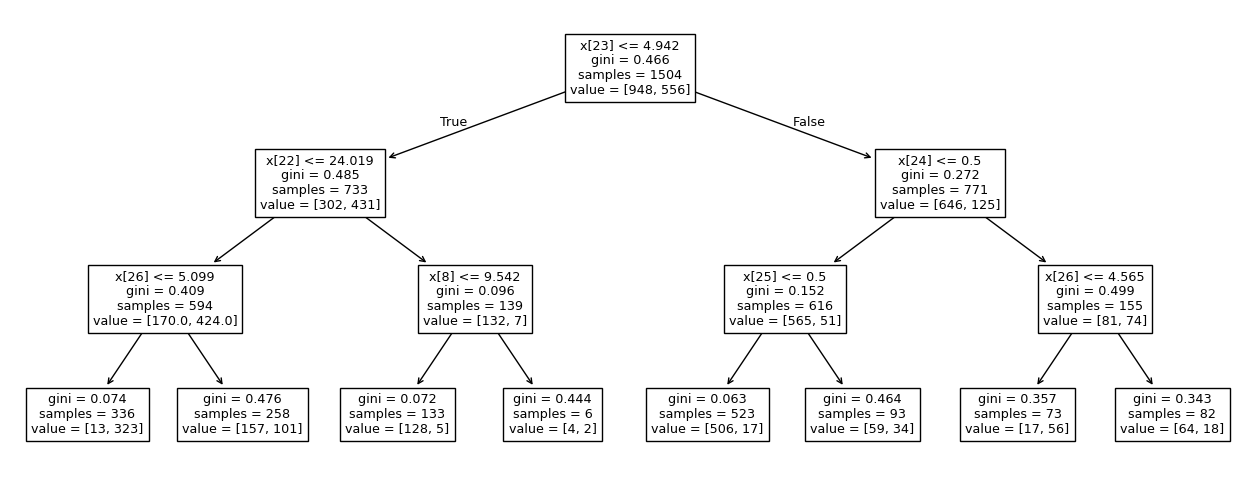

In [5]:
plt.figure(figsize=[16,6])
plt.title("Decision tree with Gini Index")
tree.plot_tree(clf_gini)
plt.show()

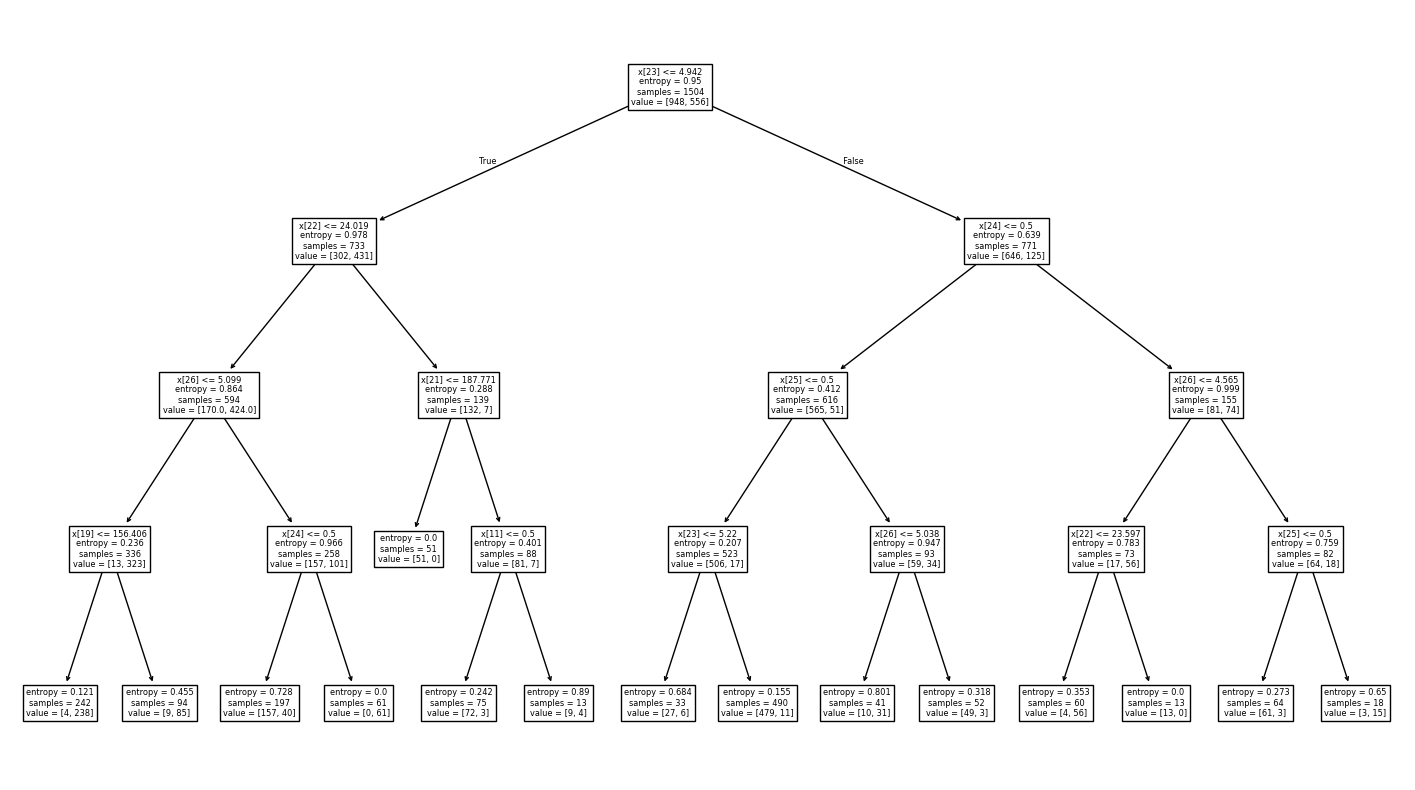

In [6]:
plt.figure(figsize=[18,10])
plt.title("Decision tree with Entropy")
tree.plot_tree(clf_entropy)
plt.show()

In [7]:
Y_predict = clf_gini.predict(X_test)
print("Accuracy is", accuracy_score(Y_test, Y_predict)*100)

Y_predict_en = clf_entropy.predict(X_test)
print("Accuracy is", accuracy_score(Y_test, Y_predict_en)*100)

Accuracy is 85.27131782945736
Accuracy is 89.30232558139535


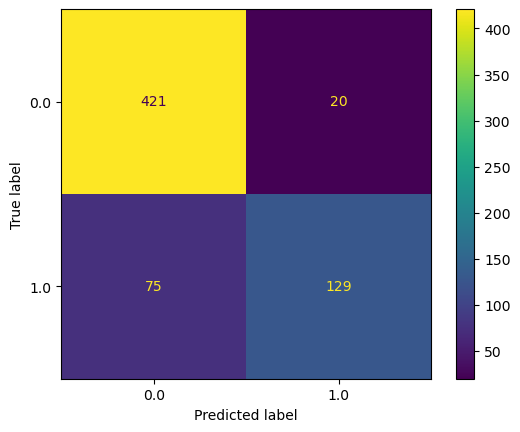

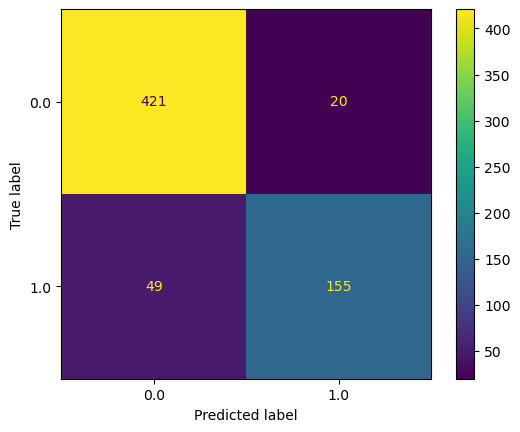

In [8]:
ConfusionMatrixDisplay.from_predictions(Y_test, Y_predict)
ConfusionMatrixDisplay.from_predictions(Y_test, Y_predict_en)

In [ ]:
param_grid = {
    'max_depth': range(2, 10, 1),
    'min_samples_split': range(2, 20, 2),
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf' : range(3, 15, 2)
}

grid_search = GridSearchCV(estimator=tree.DecisionTreeClassifier(), param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, Y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 6}
Best Accuracy: 1.0
